In [1]:

!git clone -b EMT https://github.com/pop756/Quantum_KAN.git
%cd Quantum_KAN
!pip install -r requirements.txt

Cloning into 'Quantum_KAN'...
remote: Enumerating objects: 804, done.
remote: Counting objects: 100% (804/804), done.
remote: Compressing objects: 100% (749/749), done.
remote: Total 804 (delta 104), reused 736 (delta 52), pack-reused 0
Receiving objects: 100% (804/804), 16.76 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/Quantum_KAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.8/191.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [55]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

def create_trotterized_ising_model_circuit(num_qubits, trotter_steps, time):
    """
    Trotterization을 사용하여 Ising 모델의 양자 서킷을 생성합니다.
    각 Rz 게이트의 파라미터는 Qiskit Parameter로 동적으로 설정됩니다.

    Parameters:
    - num_qubits: 큐비트의 수
    - trotter_steps: Trotterization 단계 수
    - time: 진화 시간

    Returns:
    - QuantumCircuit: 생성된 양자 서킷
    - dict: 서킷 파라미터 사전
    """
    qc = QuantumCircuit(num_qubits)
    delta_t = time / trotter_steps

    # 파라미터 설정
    h_params = [Parameter(f'h_{i}') for i in range(num_qubits)]
    J_params = [[Parameter(f'J_{i}_{j}') for j in range(num_qubits)] for i in range(num_qubits)]

    for _ in range(trotter_steps):
        # 자기 상호작용 항목 추가
        for i in range(num_qubits):
            qc.rx(2 * h_params[i] * delta_t, i)

        # 스핀 간 상호작용 항목 추가
        for i in range(num_qubits):
            for j in range(i + 1, num_qubits):
                if J_params[i][j] != 0:
                    qc.cx(i, j)
                    qc.rz(2 * J_params[i][j] * delta_t, j)
                    qc.cx(i, j)

    return qc, h_params, J_params

def create_trotterized_ising_model_circuit_train(num_qubits, trotter_steps, time):
    """
    Trotterization을 사용하여 Ising 모델의 양자 서킷을 생성합니다.
    각 Rz 게이트의 파라미터는 Qiskit Parameter로 동적으로 설정됩니다.

    Parameters:
    - num_qubits: 큐비트의 수
    - trotter_steps: Trotterization 단계 수
    - time: 진화 시간

    Returns:
    - QuantumCircuit: 생성된 양자 서킷
    - dict: 서킷 파라미터 사전
    """
    qc = QuantumCircuit(num_qubits)
    delta_t = time / trotter_steps

    # 파라미터 설정
    h_params = [Parameter(f'h_{i}') for i in range(num_qubits)]
    J_params = [[Parameter(f'J_{i}_{j}') for j in range(num_qubits)] for i in range(num_qubits)]

    for _ in range(trotter_steps):
        # 자기 상호작용 항목 추가
        for i in range(num_qubits):
            qc.rx(2 * h_params[i] * delta_t, i)

        # 스핀 간 상호작용 항목 추가
        for i in range(num_qubits):
            for j in range(i + 1, num_qubits):
                if J_params[i][j] != 0:
                    qc.rz(2 * J_params[i][j] * delta_t, j)
    return qc, h_params, J_params

# 파라미터 설정
num_qubits = 4
trotter_steps = 2  # Trotterization 단계 수
time = 1.0  # 진화 시간

# Trotterization을 사용한 Ising 모델 서킷 생성
trotterized_ising_circuit, h_params, J_params = create_trotterized_ising_model_circuit(num_qubits, trotter_steps, time)
trotterized_ising_circuit_train, h_params, J_params = create_trotterized_ising_model_circuit_train(num_qubits, trotter_steps, time)




![image.png](attachment:image.png)


사용할것 : 37~43

In [56]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit_ibm_provider
from qiskit_aer import AerSimulator
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')

backend_name = 'ibm_kyiv'
backend_error = service.backend(backend_name)

In [57]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian


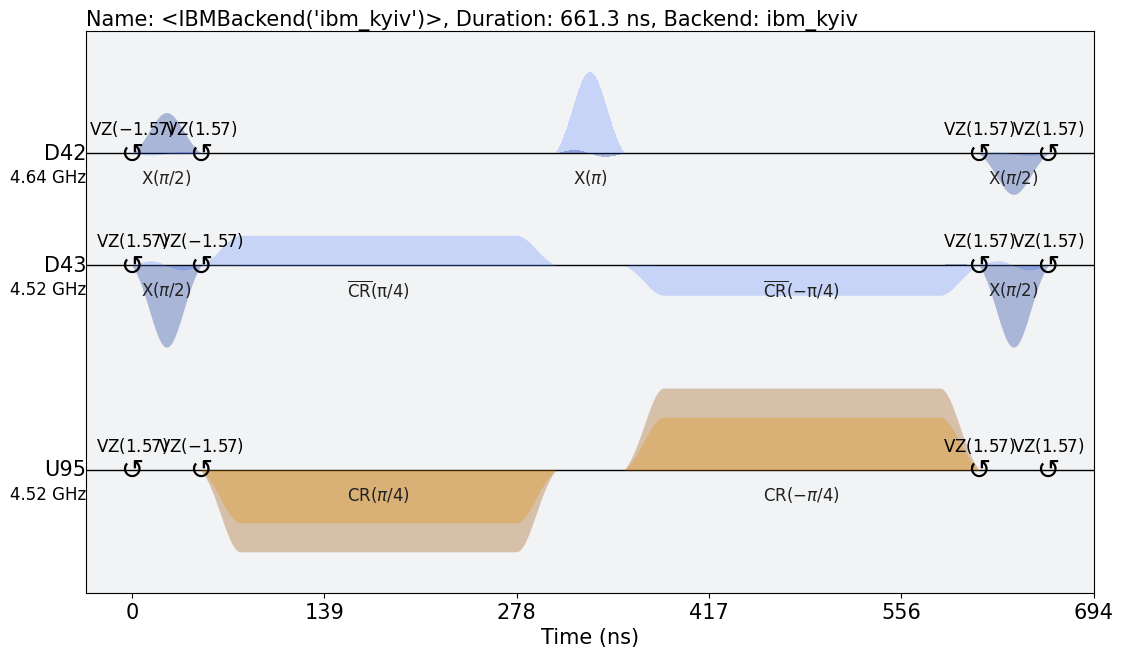

In [58]:
from qiskit import QuantumCircuit
from qiskit import pulse
from qiskit import schedule
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Options
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=[43, 42])


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend_error)
pulse_schedule = schedule(circ,backend=backend_error)
pulse_schedule.draw(backend=backend_error)

In [59]:
init_list = []
for item in backend_error.target['ecr']:
    if item[0] in qubit_use and item[1] in qubit_use:
        init_list.append(item)

In [60]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2,SamplerV2
from qiskit_ibm_runtime import Session
l = 2
init = '11'


error_gate = Gate(f"error", 2, [])
qc1 = QuantumCircuit(2, 2)
if init[0] == '1':
  qc1.x(0)
if init[1] == '1':
  qc1.x(1)
qc1.ecr(0,1)
qc1.ecr(0,1)
qc1.measure(0,0)
qc1.measure(1,1)

def update_ecr(l,init_list,backend):
  layouts = {}
  for initial_layout in init_list:
    custom_gate = Gate(f"error", 2, [])
    pulse_schedule = backend.target['ecr'][initial_layout].calibration
    pulse_copy = copy.deepcopy(pulse_schedule)
    with pulse.build(backend, name=f'err_{initial_layout}') as real_pulse:
        index=0
        for pul in pulse_schedule.instructions:
            if index == 0:
              duration = pul[1].pulse.duration
              width = pul[1].pulse._params['width']
              x_duration = pulse_copy.instructions[2][1].pulse.duration
              sigma = pul[1].pulse._params['sigma']




            try:
              pul[1].pulse._params['width']
              pul[1].pulse.duration = duration
              pul[1].pulse._params['sigma'] = sigma
              pul[1].pulse._params['width'] = width
              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1
            except:
              pass


    with pulse.build(backend, name=f'err_{initial_layout}') as my_schedule:
        index=0
        for pul in pulse_copy.instructions:
            if index == 0:
              duration = int(round(pul[1].pulse.duration*l/16)*16)
              width = int(pul[1].pulse._params['width']*l)
              x_duration = int(round(pulse_copy.instructions[2][1].pulse.duration/16)*16)
              sigma = int(pul[1].pulse._params['sigma']*l)




            try:
              pul[1].pulse._params['width']
              pul[1].pulse.duration = duration
              pul[1].pulse._params['sigma'] = sigma
              pul[1].pulse._params['width'] = width
              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1
            except:
              pass

    layouts[initial_layout] = InstructionProperties(calibration=my_schedule)

    backend.target.update_instruction_properties(f'ecr',initial_layout,properties = InstructionProperties(calibration=(real_pulse+my_schedule)))
  backend.target.add_instruction(
      custom_gate,
      layouts,
  )


  return my_schedule,real_pulse


my_schedule,pulse_real = update_ecr(l,init_list,backend_error)
initial_layout = init_list[1]
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=list(initial_layout))
qc1 = passmanager.run(qc1)


In [88]:
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])

In [89]:
import pennylane as qml
# PennyLane 디바이스 설정 (Qiskit Aer 백엔드를 사용)
my_qfunc = qml.from_qiskit(trotterized_ising_circuit_train)

dev = qml.device("default.qubit",wires=[0,1,2,3])

@qml.qnode(dev)
def circuit(theta):
  theta_list = []
  for the in theta:
    theta_list.append(the)
  my_qfunc(*theta_list,wires=[0,1,2,3])
  return qml.expval(qml.Z(0)+qml.Z(1)+qml.Z(2)+qml.Z(3))

In [90]:
label_list = []
for i in range(100):
  res = circuit(theta[i])
  label_list.append(res.numpy())

In [91]:
import torch
train_label = torch.tensor(np.array(label_list)).to(torch.float32)


In [104]:
import pennylane as qml
# PennyLane 디바이스 설정 (Qiskit Aer 백엔드를 사용)
my_qfunc = qml.from_qiskit(trotterized_ising_circuit)

dev = qml.device("default.qubit",wires=[0,1,2,3])

@qml.qnode(dev)
def circuit(theta):
  theta_list = []
  for the in theta:
    theta_list.append(the)
  my_qfunc(*theta_list,wires=[0,1,2,3])
  return qml.expval(qml.PauliZ(0)+qml.PauliZ(1)+qml.PauliZ(2)+qml.PauliZ(3))

In [105]:
label_list_valid = []
for i in range(100):
  res = circuit(theta[i])
  label_list_valid.append(res.numpy())

In [106]:
validation_label = torch.tensor(np.array(label_list_valid)).to(torch.float32)

In [107]:
import pandas as pd
lable_dict = {'train':label_list,'valid':label_list_valid}

In [108]:
data = pd.DataFrame(lable_dict)
data

,train,valid
0,2.375797,1.594905
1,-0.356744,0.667711
2,2.905596,2.819361
3,-0.006384,1.206384
4,1.250028,2.270383
...,...,...
95,3.489584,2.172917
96,2.137092,3.315807
97,3.740771,3.256711
98,3.567536,2.554875


In [87]:
data = pd.DataFrame(lable_dict)
data

,train,valid
0,2.375797,1.594905
1,-0.356744,0.667711
2,2.905596,2.819361
3,-0.006384,1.206384
4,1.250028,2.270383
...,...,...
95,3.489584,2.172917
96,2.137092,3.315807
97,3.740771,3.256711
98,3.567536,2.554875


In [ ]:
%cd Quantum_KAN
data.to_csv('./data/real_data.csv',index=False)

/content/Quantum_KAN


In [ ]:

passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=[37,38,39,40])

from qiskit.quantum_info import SparsePauliOp
"""
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)"""
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])
hamiltonian = SparsePauliOp.from_list([("ZIII", 1), ("IZII", 1), ("IIZI", 1),("IIIZ", 1)])
qc_input = passmanager.run(trotterized_ising_circuit)
isa_observables = hamiltonian.apply_layout(qc_input.layout)
with Session(backend=backend_error,) as session:
  estimator = EstimatorV2(session=session)
  estimator.resilience_level = 1
  #job = estimator.run([(qc_input, isa_observables, theta[i]) for i in range(100)])
  #job = sampler.run(qc_list,shots=8000)
  #job.update_tags(['ecr',f"l={1+l}"])

In [20]:
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')


backend = service.backend(backend_name)

In [ ]:
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=list(initial_layout))


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend)
pulse_schedule = schedule(circ,backend=backend)
pulse_schedule.draw(backend=backend)

In [96]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2,SamplerV2
from qiskit_ibm_runtime import Session
l = 0
init = '11'


error_gate = Gate(f"error", 2, [])
qc1 = QuantumCircuit(2, 2)
if init[0] == '1':
  qc1.x(0)
if init[1] == '1':
  qc1.x(1)
qc1.ecr(0,1)
qc1.ecr(0,1)
qc1.measure(0,0)
qc1.measure(1,1)

def update_ecr_real(l,init_list,backend):
  layouts = {}
  if l == 0:
    pass
  else:
    for initial_layout in init_list:
      custom_gate = Gate(f"error", 2, [])
      pulse_schedule = backend.target['ecr'][initial_layout].calibration
      pulse_copy = copy.deepcopy(pulse_schedule)
      with pulse.build(backend, name=f'err_{initial_layout}') as real_pulse:
          index=0
          for pul in pulse_schedule.instructions:
              if index == 0:
                duration = pul[1].pulse.duration
                x_duration = pulse_copy.instructions[2][1].pulse.duration
                pulse.delay(duration,pulse_schedule.instructions[2][1].channel)


              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1

      with pulse.build(backend, name=f'err_{initial_layout}') as my_schedule:
          index=0
          for pul in pulse_copy.instructions:
              if index == 0:
                duration = int(round(pul[1].pulse.duration*l/16)*16)
                width = int(pul[1].pulse._params['width']*l)
                x_duration = int(round(pulse_copy.instructions[2][1].pulse.duration/16)*16)
                sigma = int(pul[1].pulse._params['sigma']*l)




              try:
                pul[1].pulse._params['width']
                pul[1].pulse.duration = duration
                pul[1].pulse._params['sigma'] = sigma
                pul[1].pulse._params['width'] = width
                pulse.play(pul[1].pulse,pul[1].channel)
                if index<2:
                  pulse.delay(x_duration,pul[1].channel)
                index+=1
              except:
                pass

      layouts[initial_layout] = InstructionProperties(calibration=my_schedule)

      backend.target.update_instruction_properties(f'ecr',initial_layout,properties = InstructionProperties(calibration=(real_pulse+my_schedule)))





update_ecr_real(l,init_list,backend)
initial_layout = init_list[1]
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=list(initial_layout))
qc1 = passmanager.run(qc1)


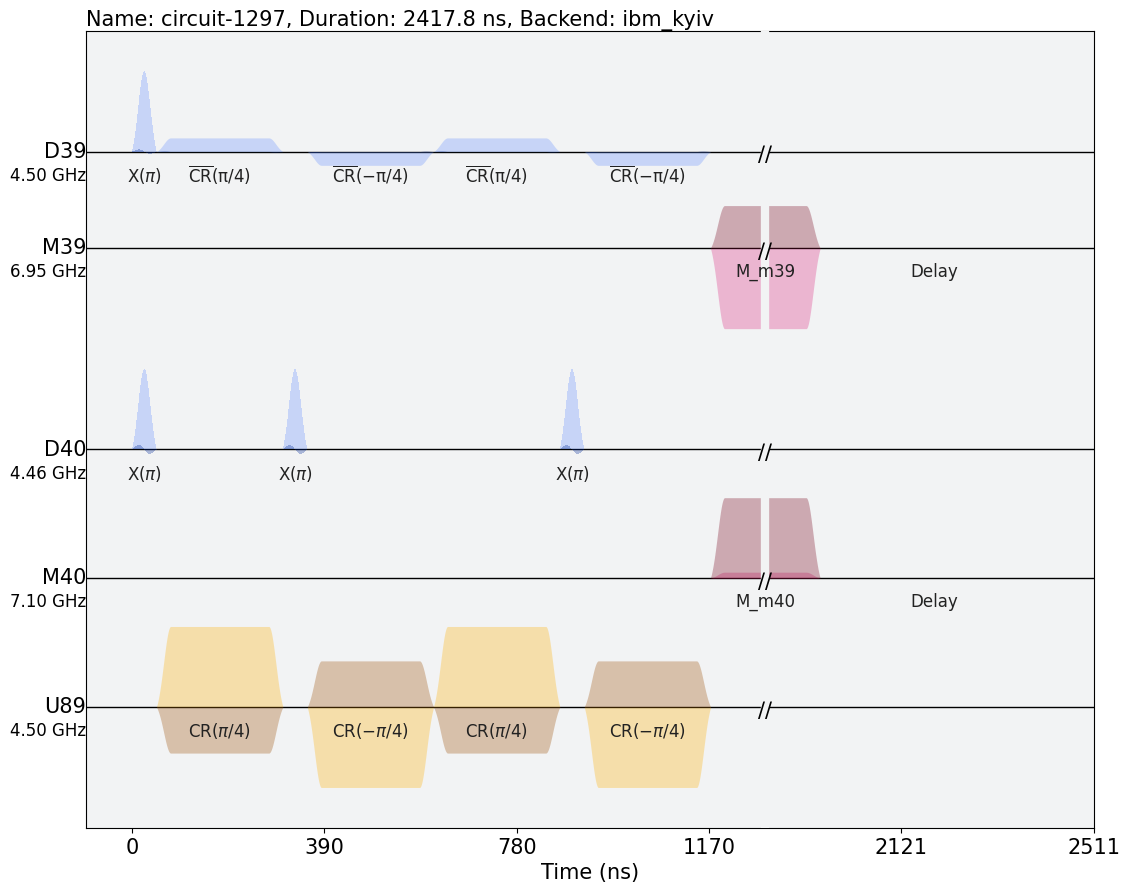

In [97]:
schedule(qc1,backend=backend).draw(backend=backend)

In [98]:
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=[37,38,39,40])

from qiskit.quantum_info import SparsePauliOp
"""
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)"""
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])
hamiltonian = SparsePauliOp.from_list([("ZIII", 1), ("IZII", 1), ("IIZI", 1),("IIIZ", 1)])
qc_input = passmanager.run(trotterized_ising_circuit)
isa_observables = hamiltonian.apply_layout(qc_input.layout)



with Session(backend=backend) as session:
  estimator = EstimatorV2(session=session)
  estimator.resilience_level = 2
  job = estimator.run([(qc_input, isa_observables, theta[i]) for i in range(100)])
  #job = sampler.run(qc_list,shots=8000)
  job.update_tags(['ecr',"ZNE"])

In [24]:
import torch
l_list = [1,1.5,2,2.5,3]

train_set = []
valid_set = []

for l in l_list:
  train_list = []
  valid_list = []

  job = service.jobs(backend_name='ibm_kyiv',job_tags=[f'l={l}'])
  for res in job[0].result():
    train_list.append(res.data.evs)
  for res in job[1].result():
    valid_list.append(res.data.evs)
  train_set.append(torch.tensor(np.array(train_list)))
  valid_set.append(torch.tensor(np.array(valid_list)))


In [54]:
dir(job[0])

['ERROR',
 'JOB_FINAL_STATES',
 '_POISON_PILL',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_api_client',
 '_async',
 '_backend',
 '_creation_date',
 '_download_external_result',
 '_empty_result_queue',
 '_error_message',
 '_error_msg_from_job_response',
 '_executor',
 '_final_interim_results',
 '_final_result_decoder',
 '_image',
 '_interim_result_decoder',
 '_interim_results',
 '_is_streaming',
 '_job_id',
 '_params',
 '_program_id',
 '_queue_info',
 '_reason',
 '_result_queue',
 '_service',
 '_session_id',
 '_set_error_message',
 '_set_status',
 '_set_status_and_error_message',
 '_start_web

In [29]:
train_data = torch.stack(train_set,dim=1)
train_data = train_data.to(torch.float32)
validation_data = torch.stack(valid_set,dim=1)
validation_data = validation_data.to(torch.float32)

In [110]:
criterion(torch.tensor(validation_data[:,0]),validation_label)

tensor(22.5394, dtype=torch.float64)

In [109]:
torch.tensor(validation_data[:,0])

tensor([-4.8254, -3.2750, -2.1897, -4.0337, -3.2727, -1.1485, -2.2664, -2.4066,
        -0.6088, -2.0364, -0.9657, -5.0698, -2.4101, -2.4054, -0.0756, -2.9624,
        -1.9921, -4.1017,  0.7485, -2.1528, -2.9005, -3.2750, -4.5106, -0.7763,
        -2.7583, -1.6469, -2.3578, -2.9111, -2.6084, -0.9767, -0.8576, -2.1386,
        -3.6625, -2.7533, -3.2102, -1.9211, -3.4890, -0.4181, -1.4045, -2.1002,
        -2.5999,  0.7528, -4.2859, -3.3799, -4.3701, -0.7237, -2.1162, -1.8751,
        -3.9005,  0.8168, -6.9490, -3.7880, -2.9687, -0.1848, -4.2324, -2.5125,
        -4.8600, -1.0130,  0.9106, -4.6239,  0.2489, -5.1753, -1.2631, -2.4812,
         1.4973,  1.4033, -1.3711, -3.3323, -1.5728, -3.1183, -1.3566,  0.6648,
         0.3783, -2.0581, -2.9843, -0.7151, -4.3541,  0.8852, -3.4898, -2.3715,
        -0.4869, -3.0065, -0.4285, -0.3175, -1.1111, -6.5147, -4.6866, -0.9965,
        -0.6472, -3.1949, -1.7913, -1.2621, -3.7919, -1.4021, -2.4745, -1.1020,
        -1.2585, -0.6724, -2.7942, -0.03

In [42]:
validation_label

tensor([ 1.5949,  0.6677,  2.8194,  1.2064,  2.2704,  2.3728,  1.8065,  2.0651,
         1.3334,  0.9767,  2.3975,  3.0344,  2.1315,  1.6236,  2.1018,  2.1714,
         1.0192,  2.7841,  0.5960,  3.3604,  3.4909,  2.4095,  1.2317,  2.4130,
         2.5669,  0.4432,  2.6385,  3.4514,  1.0016,  2.9110,  2.3480,  2.8989,
         2.3801,  3.5928,  2.2397,  1.3691,  0.9611,  1.4286,  3.1046,  3.9834,
         1.6261,  2.9482,  3.0912,  2.8975,  2.4302,  1.8218,  2.9936,  2.7135,
         3.7001,  2.1624,  2.6721,  1.3711,  2.6422,  2.4779,  1.9342,  2.7345,
         2.2362,  0.2638,  2.4670,  1.4996,  0.9212,  2.2116,  2.5194,  2.0846,
         1.3119,  2.3002,  2.3844,  1.9215,  1.5306,  3.2119,  1.8535,  1.4307,
         0.3303,  2.5386,  1.6360,  2.7254,  0.5493,  1.3657,  1.5283,  1.2706,
         3.6532,  3.6132,  1.9338,  3.6256,  1.0209, -0.9817,  2.9266,  1.6763,
         1.0311,  3.2476,  3.7775,  1.2901,  3.6400,  2.3922,  2.6610,  2.1729,
         3.3158,  3.2567,  2.5549,  2.53

<ipython-input-39-b1334044fe07>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(train_data), torch.tensor(train_label))
<ipython-input-39-b1334044fe07>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  validation_dataset = TensorDataset(torch.tensor(validation_data), torch.tensor(validation_label))
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/200, Training Loss: 2.696945774555206, Validation Loss: 1.805600768327713
Epoch 2/200, Training Loss: 1.914707463979721, Validation Loss: 1.1873916685581207
Epoch 3/200, Training Loss: 1.6794060528278352, Validation Loss: 3.7625874161720274
Epoch 4/200, Training Loss: 1.4815118730068206, Validation Loss: 1.3702176630496978
Epoch 5/200, Training Loss: 1.5147724866867065, Validation Loss: 1.2265015423297883
Epoch 6/200, Training Loss: 1.400205624103546, Validation Loss: 1.300066167116165
Epoch 7/200, Training Loss: 1.4927690863609313, Validation Loss: 1.1258391588926315
Epoch 8/200, Training Loss: 1.4344262182712555, Validation Loss: 1.1005741715431214
Epoch 9/200, Training Loss: 1.537353789806366, Validation Loss: 1.3604483723640441
Epoch 10/200, Training Loss: 1.3636444628238678, Validation Loss: 0.9334802716970444
Epoch 11/200, Training Loss: 1.4093128204345704, Validation Loss: 1.3999274611473083
Epoch 12/200, Training Loss: 1.3703502774238587, Validation Loss: 1.147105836868

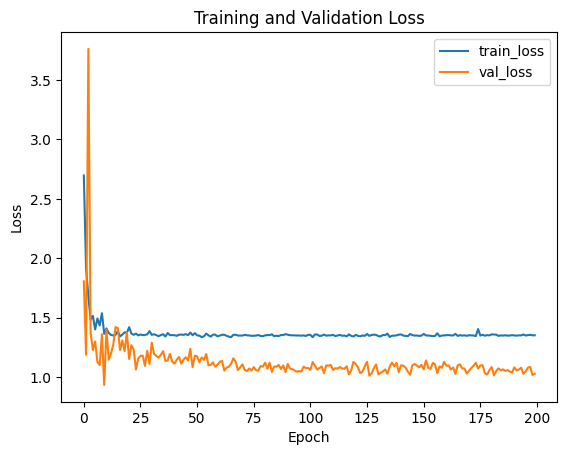

[[1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.8126208]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]
 [1.7642443]

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# 데이터셋 및 데이터로더
train_dataset = TensorDataset(torch.tensor(train_data), torch.tensor(train_label))
validation_dataset = TensorDataset(torch.tensor(validation_data), torch.tensor(validation_label))
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=10, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(5, 64)
        self.layer2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.to(torch.float32)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# 모델 초기화
model = MLP()

# 손실 함수 및 옵티마이저
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

# 모델 학습
num_epochs = 200
train_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

    validation_losses.append(validation_loss / len(validation_loader))

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {validation_losses[-1]}')

# 손실(loss) 그래프
plt.plot(train_losses, label='train_loss')
plt.plot(validation_losses, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 검증 데이터로 예측
model.eval()
with torch.no_grad():
    validation_inputs = torch.tensor(validation_data)
    predictions = model(validation_inputs)
    print(predictions.numpy())
